#Flujo de trabajo

##Tipos de validación

1. Validación simple (el más utilizado)
Se retiene una parte de los datos para validación
2. Validació k flod
Se hacen k particiones de igual tamaño y a cada partición se le evalua con la k-1. Se promedia todo para el loss accuracy.
3. Validación k fold repetidas con aleatorización
Aquí evitamos los sesgos
4. Validación k fold estratificada

## Problemas potenciales

1. Representatividad. Datos ordenados del 0 a 9. Solución: Aleatorizar
2. Flecha temporal. Predicciones a futuro, validar con datos posteriores al entrenamiento. Solución: No aleatorizar.
3. Redundancia. Datos repetidos. Solución: Asegurar que los datos de entrenamiento y validación son conjuntos disjuntos.

## Preprocesamiento de datos
Paso 1: Vectorizar los datos, todo en flotantes y en ciertos casos como 
enteros.

Paso 2: Normalizar o estandarizar con variavles con límites fijos
(desviación estándar y la normalización vista en IA).

Para tratar datos faltantes, los consideramos cero. La condición pra ellos es que el 0 no es un valor significativo; la red aprende que 0 son datos faltantes.
En la red de entrenamiento deberían tener datos faltantes.

## Feature engineering
Escoger las variables que me convienen. Todo para que el alogritmo funcione mejor.





#Sobreajuste y subajuste

## Subajuste
Nos falta info y tenemos error
## Sobreajuste
Ajustamos de más y hay error

## Compromiso entre Bias y Varianza
Bias $⇒$ Error observado al ajustar una función a los datos. Se introduce cuando el modelo es demasiado restrictivo. Modelos flexibles disminuyen el bias para datos de entrenamiento.

Varianza $⇒$ Cuánto tendría que cambiar nuestro modelo para hacer predicciones sobre datos diferentes a los del entrenamiento.

## Regularización
Evitar sobreajustes $⇒$

*   Más datos de entrenamiento
*   Modular la cantidad de info. almacenada por el modelo.
*   Poner constricciones sobre que infromación se permite almacenar.

Medidas $⇒$
* Reducir la capacidad de la red
* $costo - peso$ and $costo - peso^{2}$
* Dropout $→$ Pone a cero entre 0.2 y 0.5 de los outputs. Esto en el proceso de entrenamiento.





# Redes Aleatorias

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def enlaces_aleatorios(N, p):
  for i in range(N):
    for j in range(i):
      if np.random.rand() < p:
        yield i,j

def red_aleatoria(N, p):
  G = nx.Graph()
  G.add_nodes_from(range(N)) # agrega todos los nodos
  
  G.add_edges_from( enlaces_aleatorios(N, p) ) # agrega los enlaces obedeciendo la probabilidad p
  
  return G

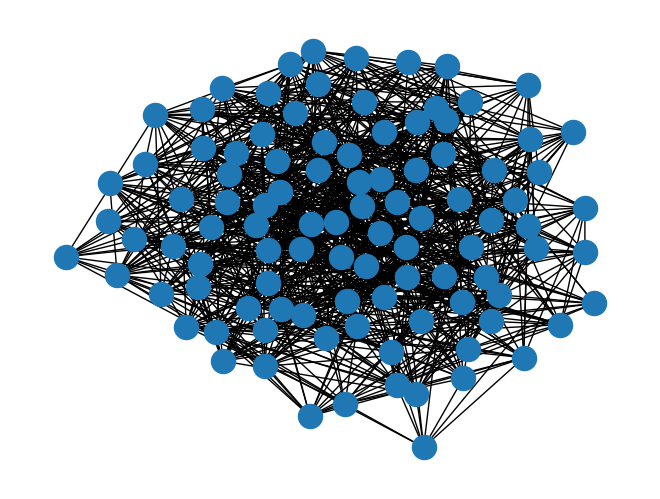

In [3]:
N = 100
p = .2

nx.draw(red_aleatoria(N,p))

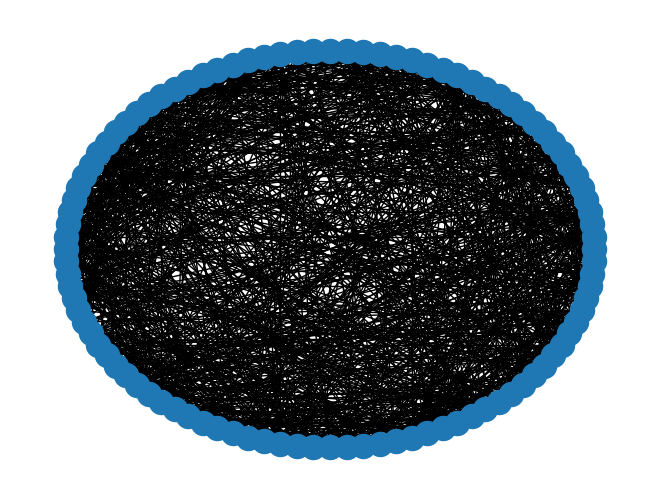

In [4]:
nx.draw_circular(red_aleatoria(N,p))

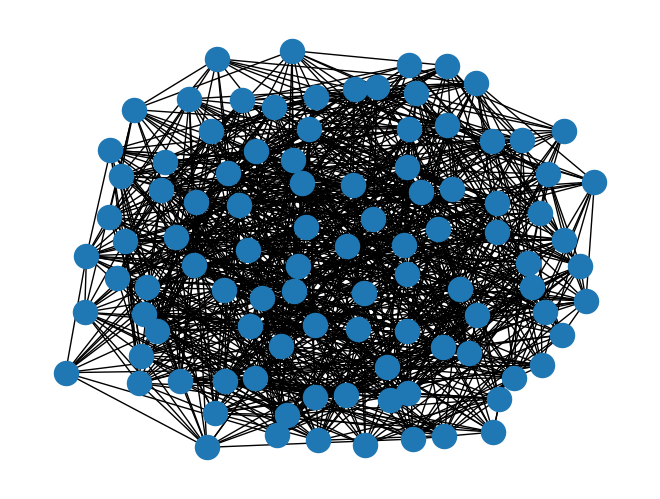

In [5]:
nx.draw_kamada_kawai(red_aleatoria(N,p))

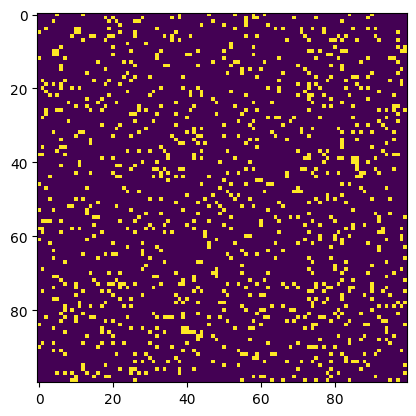

In [6]:
N = 100
p = .1

A = np.triu(np.ones((N,N)), k = 1)*(np.random.rand(N,N) < p)
A = A.T + A

plt.imshow(A)

In [7]:
type(A)

numpy.ndarray

In [8]:
def red_aleatoria(N,p):
    ### aqui debes definir la matriz de adyacencia como se hizo antes
    A = np.triu(np.ones((N,N)), k = 1)*(np.random.rand(N,N) < p)
    ### aqui debes utilizar la funcion nx.from_numpy_array()
    ### para generar la red. Usa el nombre G
    G = nx.from_numpy_array(A)
    G.edges(data = True)
    nx.draw_kamada_kawai(G)
    return G

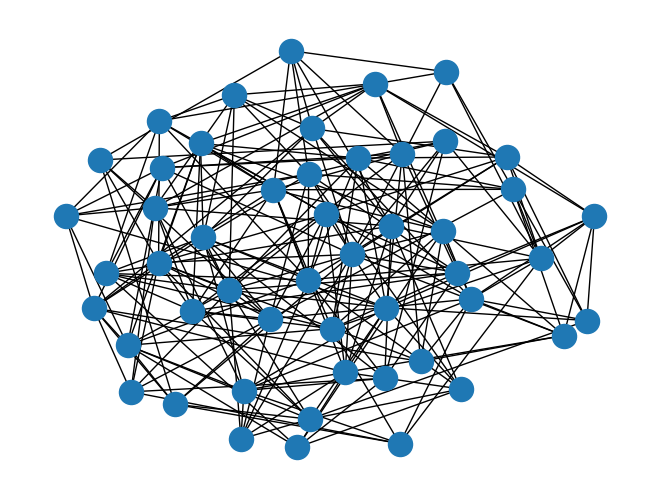

In [9]:
red_aleatoria(50,0.2)

500

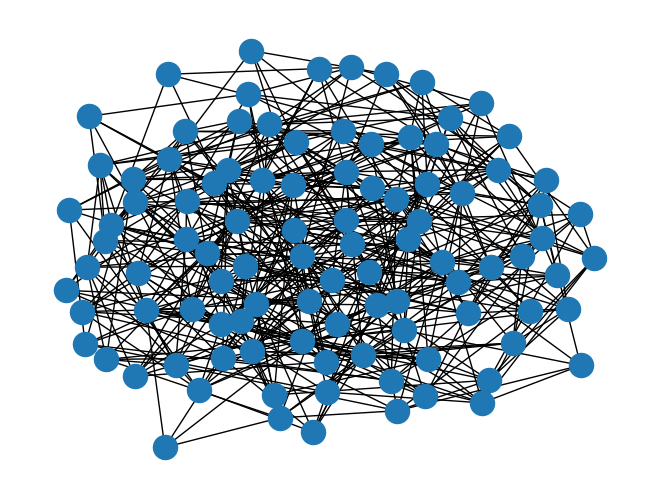

In [10]:
N = 100
p = .1
G = red_aleatoria(N,p)

len(G.edges)

In [11]:
def red_aleatoria(N,p):
    ### aqui debes definir la matriz de adyacencia como se hizo antes
    A = np.triu(np.ones((N,N)), k = 1)*(np.random.rand(N,N) < p)
    ### aqui debes utilizar la funcion nx.from_numpy_array()
    ### para generar la red. Usa el nombre G
    G = nx.from_numpy_array(A)
    G.edges(data = True)
    return G

In [79]:
# elige los valores para N, p y el numero de corridas
N = 10
p = 0.9
corridas = 1000

lista_L = []  # esta linea define una lista sin elementos a la que se iran agregando los valores de L
for i in range(corridas):
    
    #####
    ##### inician campos a rellenar:
    #En la siguiente linea genera una red aleatoria con los parametros indicados
    G = red_aleatoria(N,p)
    
    #Ahora calcula el numero de enlaces de la red generada
    L = len(G.edges)
    
    ##### terminan campos a rellenar
    #####
    
    
    lista_L.append(L) #aqui se agrega el valor de L a la lista


print('El valor esperado de L es ', np.mean(lista_L))

El valor esperado de L es  40.398


In [80]:
y, x = np.histogram(lista_L, bins = range(int(N*(N-1)/2)))

In [81]:
# Aquí imprimimos los valores de x, que son los valores de L
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44])

In [82]:
# Aqui podemos imprimir la lista de valores de y, que son las frecuencias de los valores de L
y

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   3,   7,  24,  45,  72,
       154, 213, 181, 165, 126], dtype=int64)

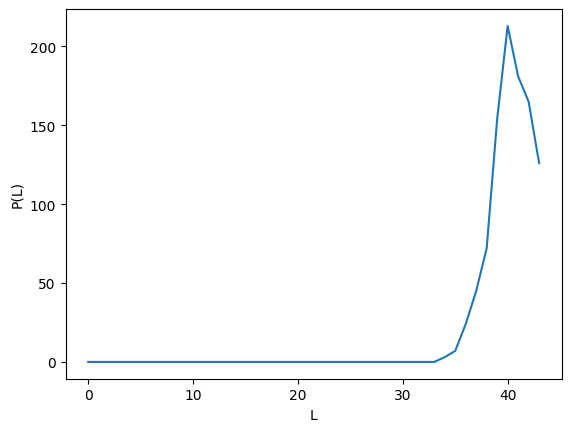

In [83]:
# Le ponemos nombres a los ejes
plt.xlabel('L')
plt.ylabel('P(L)')
plt.plot(x[:-1],y)
plt.show()

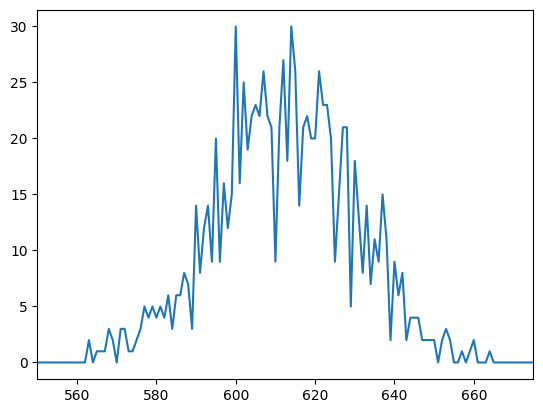

In [17]:
plt.plot(x[:-1], y)

xmin = 550
xmax = 675
plt.xlim([xmin, xmax])
plt.show()

(array([1151.,   17.,   10.,    8.,    7.,    5.,    7.,   12.,    4.,
           3.]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.]),
 <BarContainer object of 10 artists>)

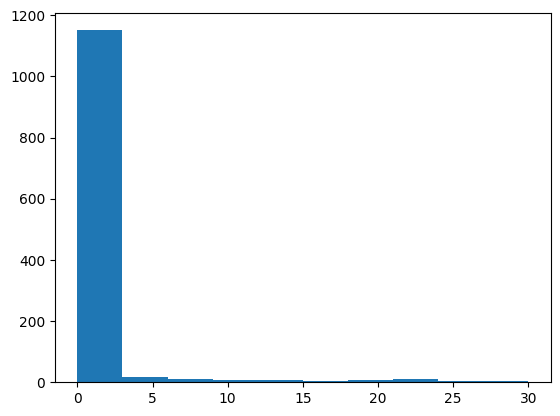

In [18]:
plt.hist(y)


In [19]:
k_mean = (2*np.mean(lista_L))/N

In [20]:
k_mean

24.49

In [21]:
len(G.degree),len(lista_L)

(50, 1000)

In [22]:
G.nodes(1)

NodeDataView({0: None, 1: None, 2: None, 3: None, 4: None, 5: None, 6: None, 7: None, 8: None, 9: None, 10: None, 11: None, 12: None, 13: None, 14: None, 15: None, 16: None, 17: None, 18: None, 19: None, 20: None, 21: None, 22: None, 23: None, 24: None, 25: None, 26: None, 27: None, 28: None, 29: None, 30: None, 31: None, 32: None, 33: None, 34: None, 35: None, 36: None, 37: None, 38: None, 39: None, 40: None, 41: None, 42: None, 43: None, 44: None, 45: None, 46: None, 47: None, 48: None, 49: None}, data=1)

In [23]:
k_nice = 0
for i in lista_L:
  k_nice += G.degree()/G.nodes(i)

print(k_nice)

TypeError: unsupported operand type(s) for /: 'DegreeView' and 'NodeDataView'

# Ejercicio

In [35]:
# elige los valores para N, p y el numero de corridas
N = 100
p = 0.0001
corridas = 1000

lista_L = []  # esta linea define una lista sin elementos a la que se iran agregando los valores de L
for i in range(corridas):
    
    #####
    ##### inician campos a rellenar:
    #En la siguiente linea genera una red aleatoria con los parametros indicados
    G = red_aleatoria(N,p)
    
    #Ahora calcula el numero de enlaces de la red generada
    L = len(G.edges)
    
    ##### terminan campos a rellenar
    #####
    
    
    lista_L.append(L) #aqui se agrega el valor de L a la lista


print('El valor esperado de L es ', np.mean(lista_L))

El valor esperado de L es  0.484
